## Camera Calibration using Python & OpenCV

In [3]:
# Necessary imports
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

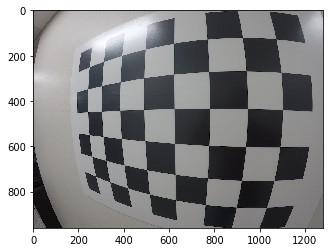

In [11]:
# Preview a calibration image
image = mpimg.imread('images/GOPR0036.jpg')
plt.imshow(image)

In [33]:
%matplotlib qt

# Compute the object and image points
objpoints = []
imgpoints = []

nx = 8
ny = 6

objp = np.zeros([ny*nx, 3], dtype=np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape([-1, 2])

for idx, path in enumerate(glob.glob('images/GOPR*.jpg')): 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    
    try:
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
                
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            
            cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
            cv2.imshow('img', img)
            cv2.waitKey(500)

    except Exception as e:
        print('Couldnt find the chess board corners for this image. Exception: {}'.format(e))
        
cv2.destroyAllWindows()

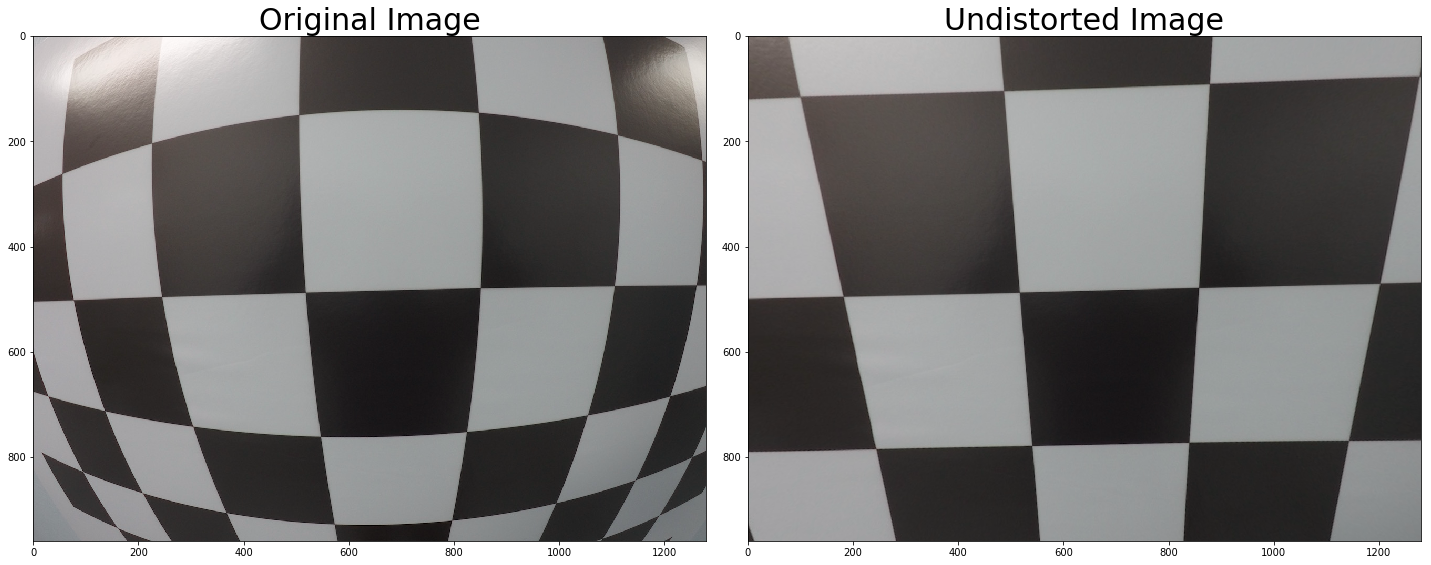

In [38]:
%matplotlib inline

# Compute the camera calibration matrix and the distortion coefficients
def calib_undistort_image(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mtx, dst, rvec, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    return cv2.undistort(img, mtx, dst, None, mtx)

img = cv2.imread('images/test_image.jpg')
img_undist = calib_undistort_image(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(img_undist)
ax2.set_title('Undistorted Image', fontsize=30)